<a href="https://colab.research.google.com/github/varamba/Ya_practicum_projects/blob/main/business_ab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Приоритизация гипотез.

Необходимо подготовить список гипотез для увеличения выручки.
Для этого нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Задача:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings 
warnings.filterwarnings("ignore")

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [14]:
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [15]:
df.columns = df.columns.str.lower()

### ICE

Расчитаем фреймворк ICE

In [16]:
df['ice'] = (df['impact']*df['confidence']/df['efforts']).round(2)
df.sort_values(by = 'ice', ascending= False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### RICE

Расчитаем фреймворк RICE

In [17]:
df['rice'] = (df['reach']*df['impact']*df['confidence']/df['efforts']).round(2)
df.sort_values(by = 'rice', ascending= False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Ситуация поменялась после учета в формуле показателя "Охват", ведь фреймворк RICE это тот же ICE, только помноженный на "Охват", соответсвенно он и повлиял на итоговую оценку.

Вообще странно пользоваться методом ICE, когда речь идет о гипотезах, которые должны повлиять пользователей. Я редко могу себе представить ситуацию, когда ICE > RICE, разве что когда охват пользователей будет максимальным в любом случае, тогда reach будет константой и значение ICE не изменится.

После 2х методов приоритизаций видим одну очень перспективную гипотезу под номером 7, на нее стоить обратить особое внимание, далее идут примерно в равной степени гипотезы 2, 0, 6 - их бы я рассматривал в следующую оередь. Остальные не внушают доверие.

## Анализ A/B-теста

Были проведены A/B-тесты и получены результаты.

Необходимо:
- Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста и объяснить его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

### Предобработка данных

In [18]:
orders, visitors = (pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'), pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'))

In [19]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
display(orders.describe())
display(visitors.describe())

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Переименуем столбцы: приведем к нижнему регистру и "змеиному" стилю.

In [22]:
orders = orders.rename(
 columns={
'transactionId' : 'transaction_id',
'visitorId' : 'visitor_id'}
)

Поменяем формат дат.

In [23]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [24]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Посчитаем дупликаты.

In [25]:
orders.duplicated().sum()

0

In [26]:
visitors.duplicated().sum()

0

Посчитаем пропуски.

In [27]:
orders.isna().sum().sort_values()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [28]:
visitors.isna().sum().sort_values()

date        0
group       0
visitors    0
dtype: int64

Проверим сколько групп в тестах.

In [29]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [30]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Посмотрим на количество пользователей, которые попали в обе группы.

In [31]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Удалим их.

In [32]:
ab_users = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()

In [33]:
orders = orders.query('visitor_id not in @ab_users')

In [34]:
#check
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

Предобработка закончена: дупликатов и пропусков нет, названия столбцов и формат даты изменены, пользователей в 2х группах удалены.

### График кумулятивной выручки по группам

In [35]:
#Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [36]:
#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transaction_id' : pd.Series.nunique, 
                                          'visitor_id' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [37]:
#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [38]:
#Объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [39]:
#Переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [40]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Строим график

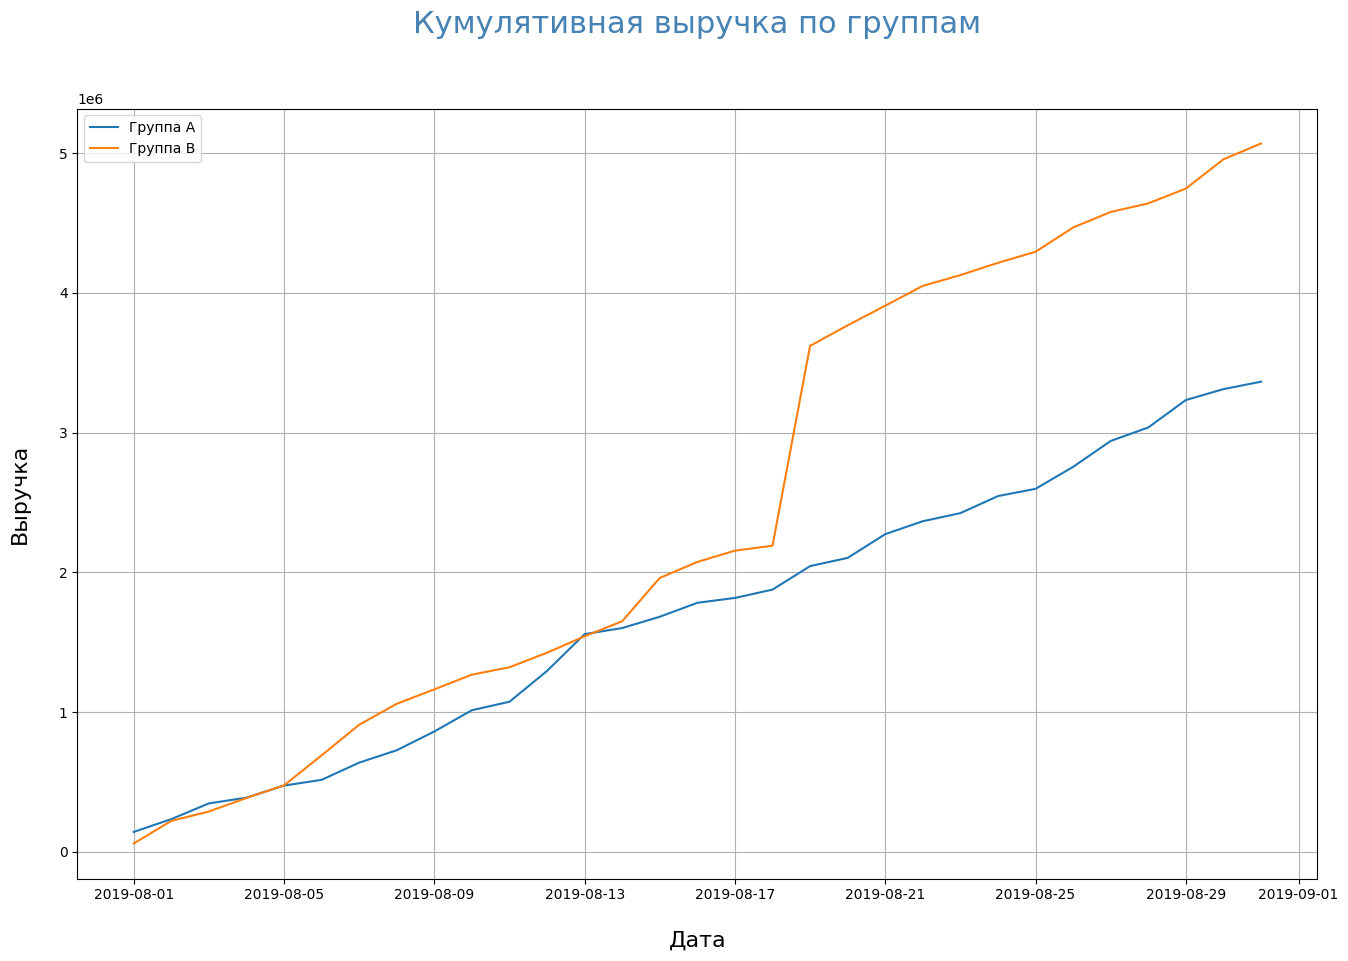

In [41]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(16,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.title('Кумулятивная выручка по группам\n' + "\n", fontsize = 22, color = 'SteelBlue') 
plt.xlabel('\nДата', fontsize =16)
plt.ylabel('Выручка\n', fontsize =16)
plt.grid()
plt.legend();

На графике виден скачек в группе В, примерно после 18-20 августа. Возможно стало сильно больше заказов в эти дни, либо увелиился средний чек за покупку. Будем смотреть дальше.

### График кумулятивного среднего чека по группам

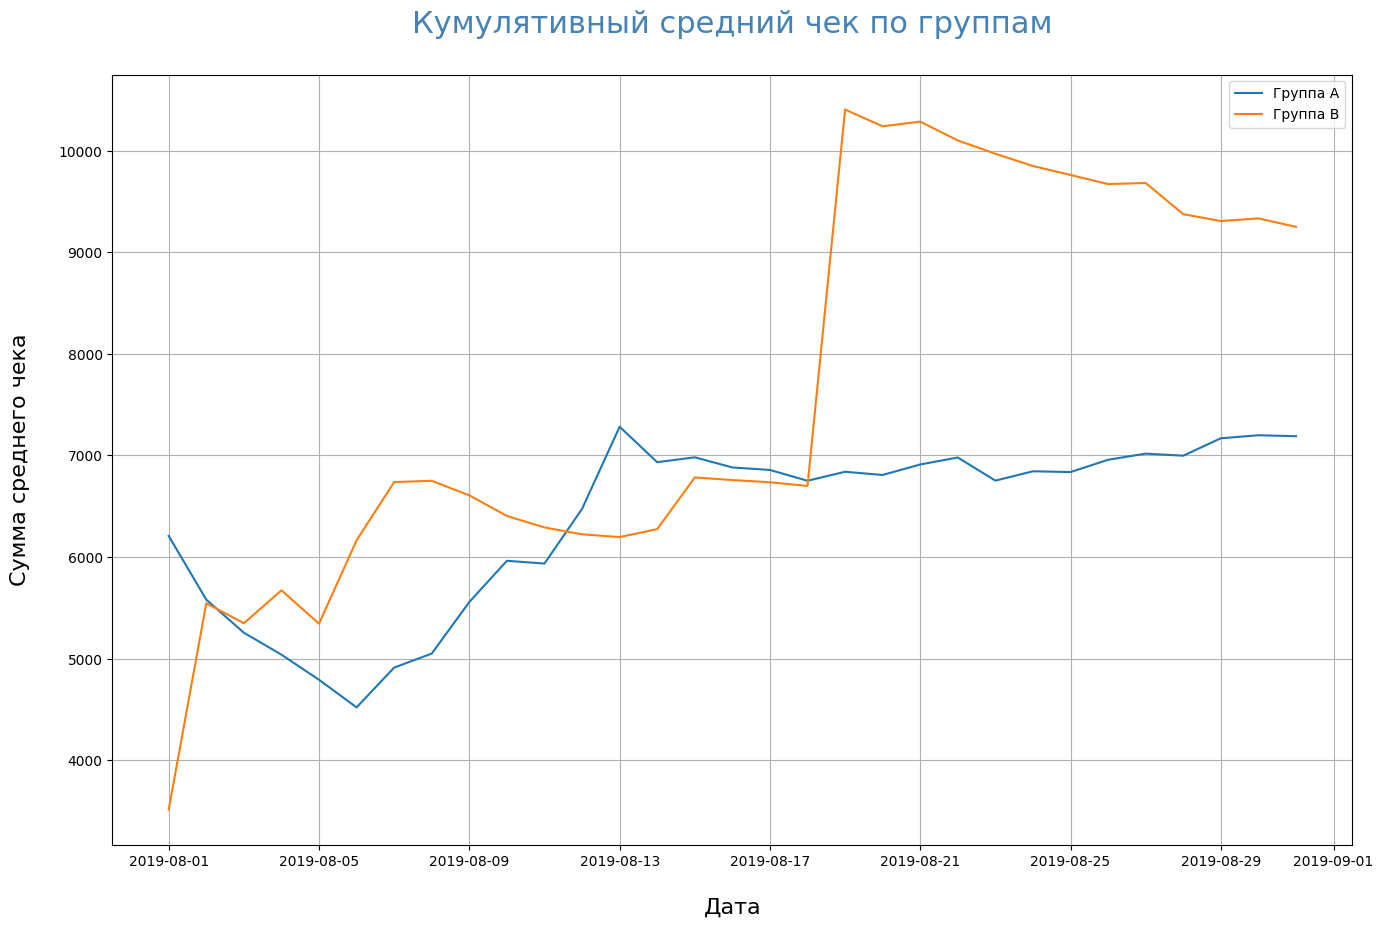

In [42]:
plt.figure(figsize=(16,10))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.title('Кумулятивный средний чек по группам'  + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nДата', fontsize =16)
plt.ylabel('Сумма среднего чека\n', fontsize =16)
plt.legend() ;

Видим скачек среднего чека в те же даты с 18 по 20 августа. Это не очень хорошо, возможно есть аномальные значения, которые так сильно изменяют картину.

### График относительного изменения кумулятивного среднего чека группы B к группе A

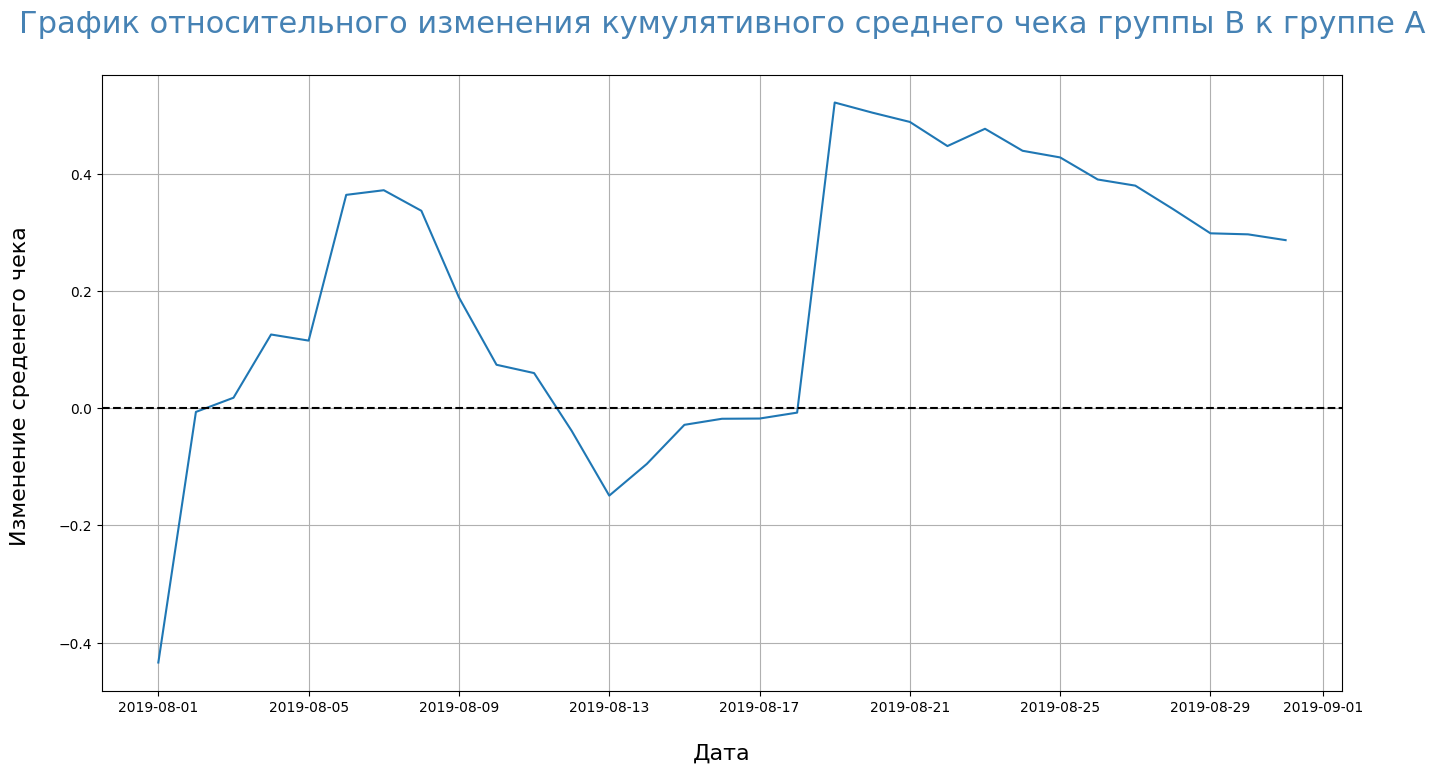

In [43]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n ', fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nДата', fontsize = 16)
plt.ylabel('Изменение среденего чека \n', fontsize = 16)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Видим как меняется чек в определенные даты. В начале месяца наблюдается рост, но это только начало теста. К середине теста 18-20 августа видим непредсказуемый резкий скачек на 50%

### График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя или по сути конверсию(посетитель становится покупателем).

''

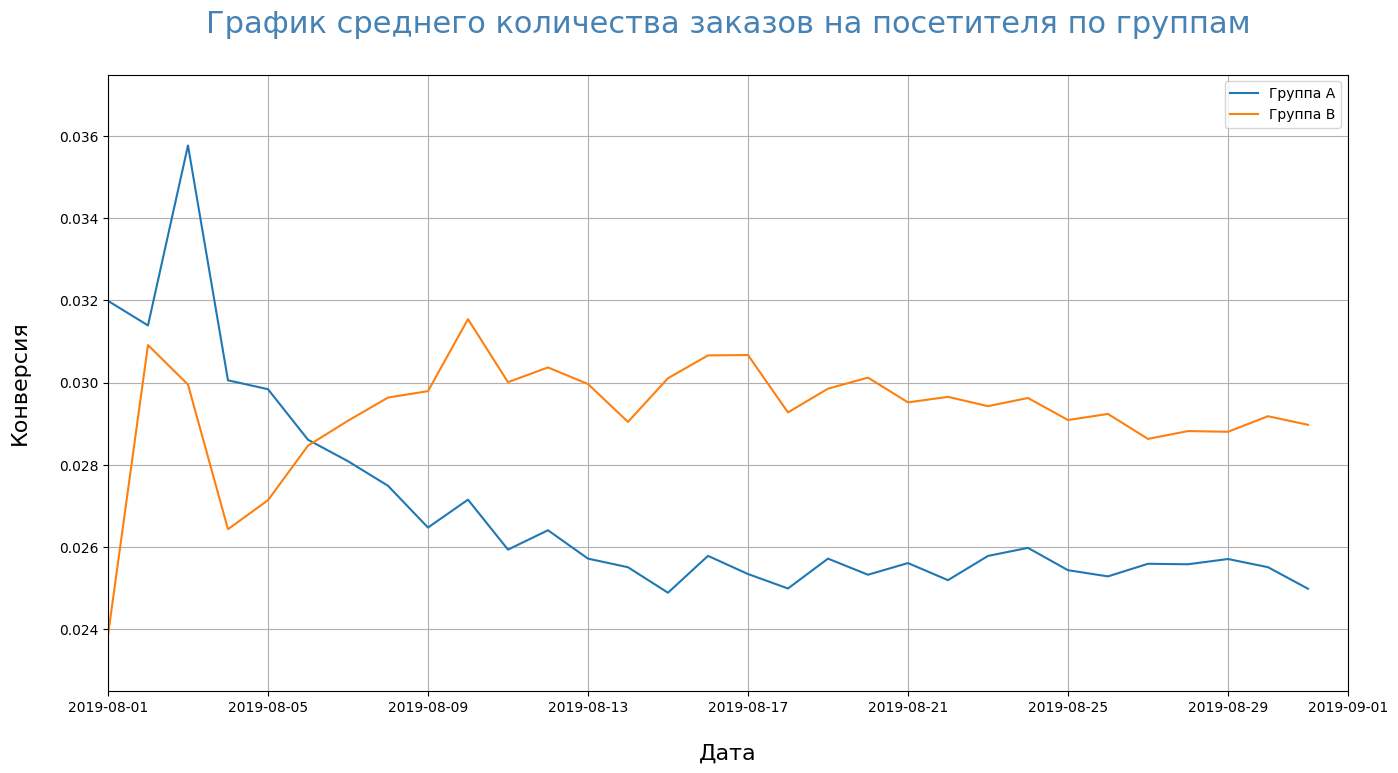

In [44]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.legend()
plt.title('График среднего количества заказов на посетителя по группам\n  ', fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nДата', fontsize = 16)
plt.ylabel('Конверсия\n', fontsize = 16)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.ylim((0.0225,0.0375))
;

В начале теста группа А лидировала, но потом группа В обогнала ее и зафиксировалась стабильно выше группы А примерно на 0.5-1.5%.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

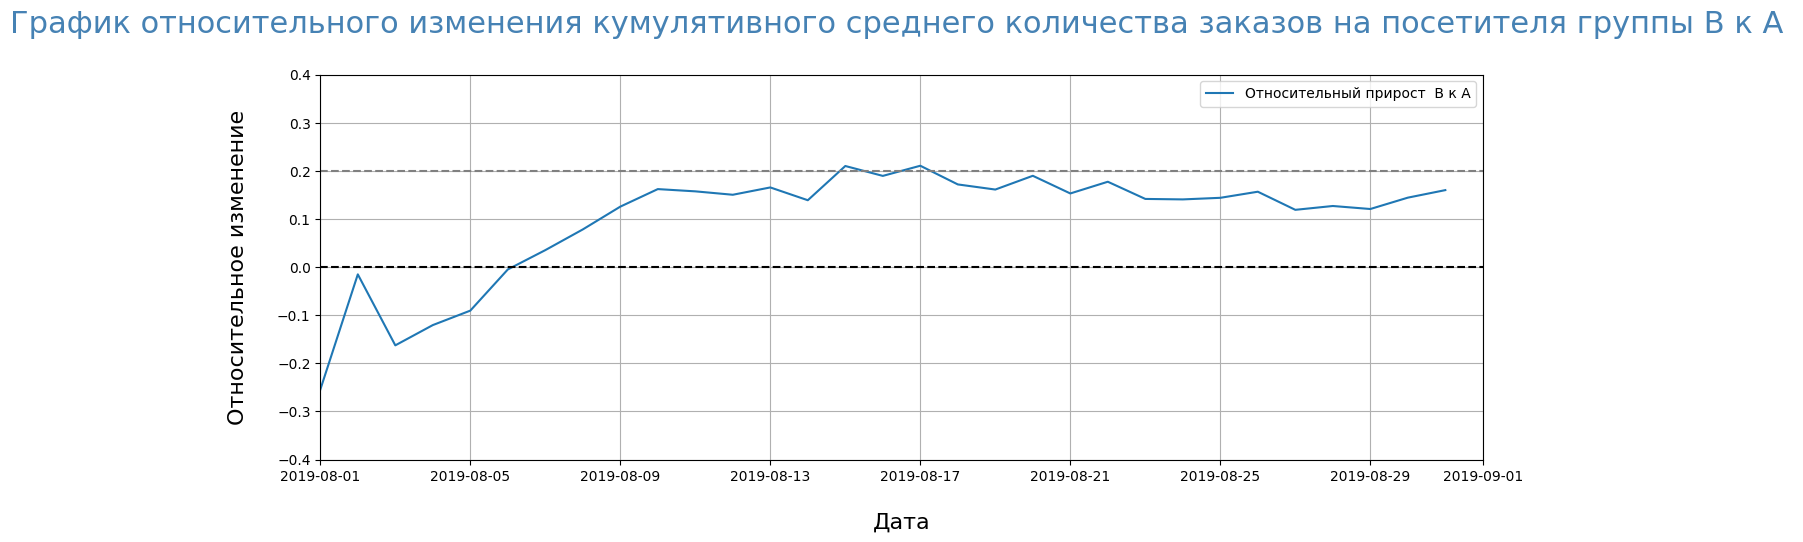

In [45]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост  B к A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.4, 0.4])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к A \n  ', fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nДата', fontsize = 16)
plt.ylabel('Относительное изменение\n', fontsize = 16);

Как видно было раньше, группа В имеет большее значение среднего количества заказов на посетителя чем группа А примерно на 12-17% относительно друг друга.

### Точечный график количества заказов по пользователям

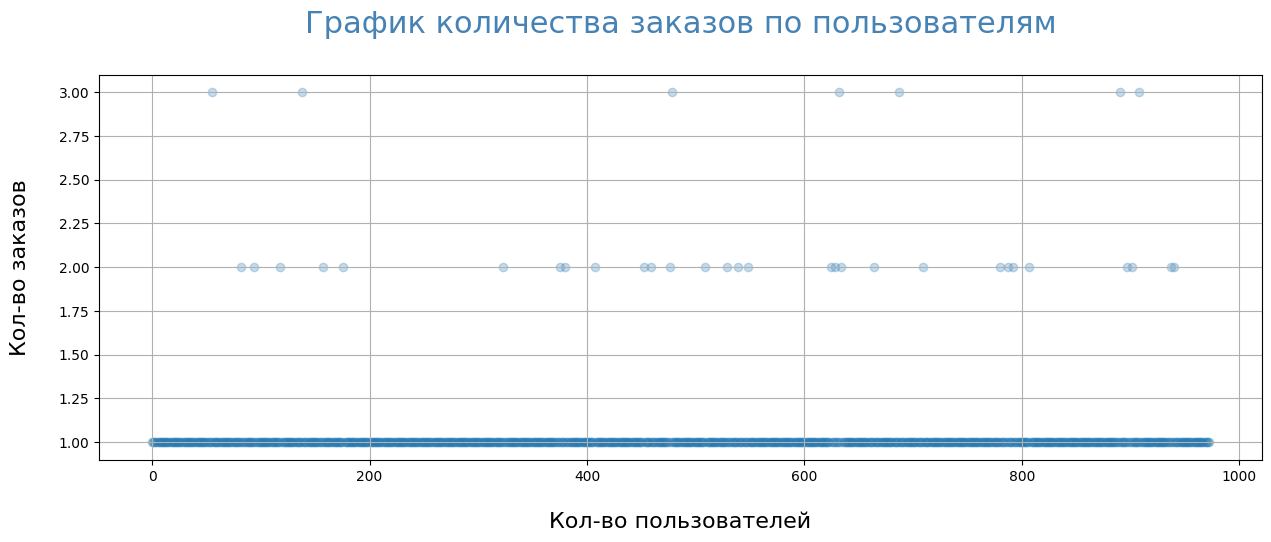

In [46]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False). \
                                                                        agg({'transaction_id' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ', fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nКол-во пользователей', fontsize = 16)
plt.ylabel('Кол-во заказов\n', fontsize = 16)
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.25);

Большинство посетителей совершило 1 заказ, небольшая часть - 2, и несколько человек сделало 3 заказа. Не исключено, то такие пользователи являются выбросами.

### 95-й и 99-й перцентили количества заказов на пользователя

Найдем границу.

In [47]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


95% пользователей совершают не больше 1 заказа, 99% совершают 2, значит все остальное - аномалия, т.е. посетители сделавшие 3 заказа.

### Точечныей график стоимостей заказов

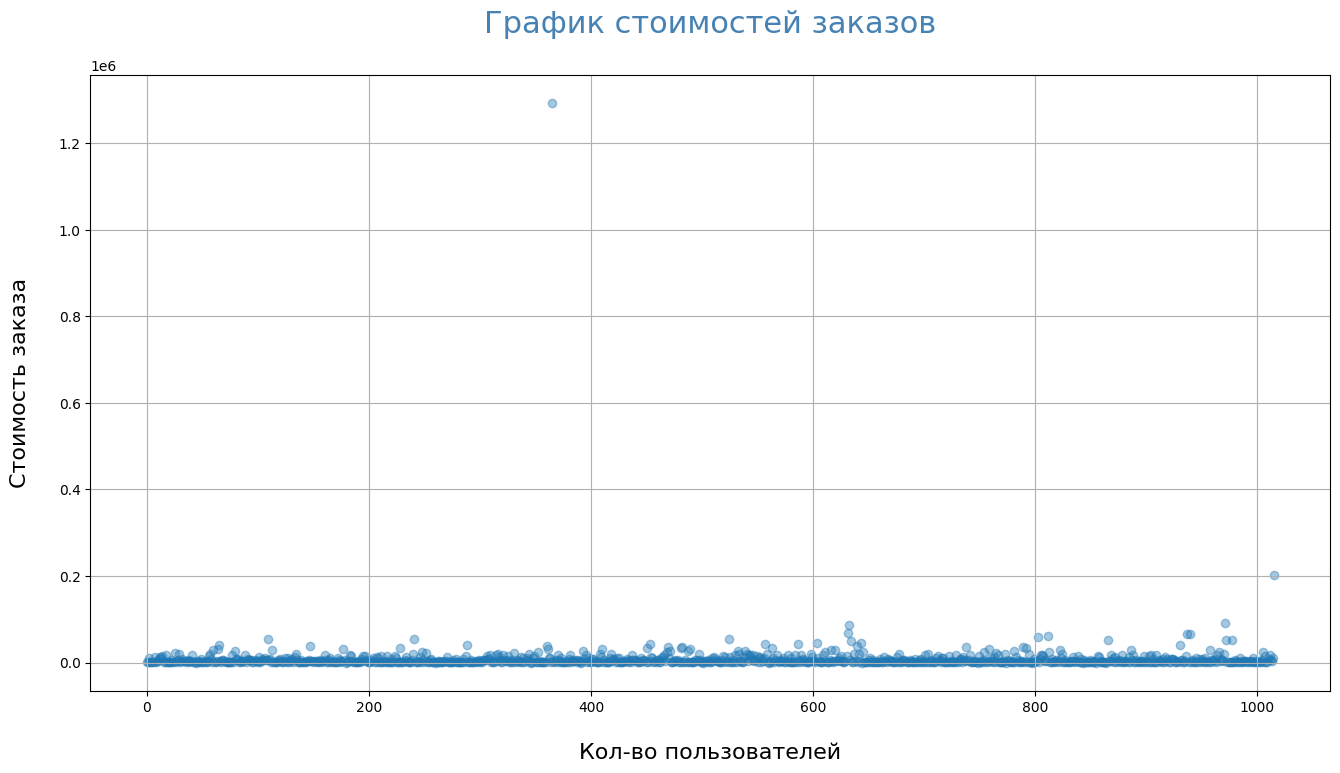

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(16,8))
plt.grid()
plt.title('График стоимостей заказов\n ', fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nКол-во пользователей', fontsize = 16)
plt.ylabel('Стоимость заказа\n', fontsize = 16)
plt.scatter(x_values, orders['revenue'], alpha=0.4);

А вот и конкретные аномалии подъехали.

In [49]:
orders.query('revenue > 200000')

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Вот и нашелся тот заказ, который так сильно менял статистику, как раз 19 августа была покупка на 1.3 млн, не уверен что это можно считать нормальным. Заказ на 200 тыс. тоже спорный.

In [50]:
n_orders = orders.query('revenue < 200000')

Строим новый график.

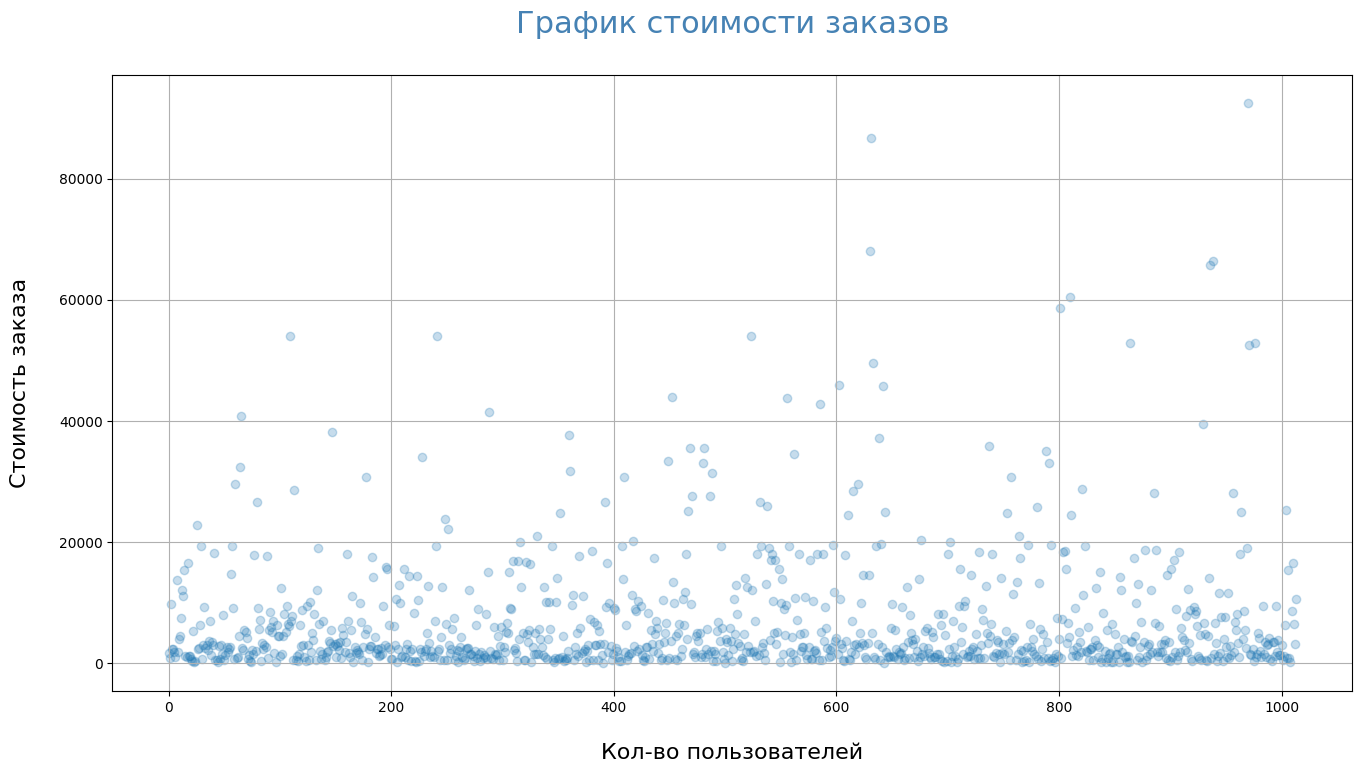

In [51]:
x_values = pd.Series(range(0,len(n_orders['revenue'])))
plt.figure(figsize=(16,8))
plt.grid()
plt.title('График стоимости заказов\n ', fontsize = 22, color = 'SteelBlue')
plt.xlabel('\nКол-во пользователей', fontsize = 16)
plt.ylabel('Стоимость заказа\n', fontsize = 16)
plt.scatter(x_values, n_orders['revenue'], alpha=0.25);

Так гораздо лучше смотрится. Более подробно рассмотрим значения с помощью перцентилей.

### 95-й и 99-й перцентили стоимости заказов

In [52]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

У 95% заказов чек выше 26785 рублей, и у 1% дороже 53904 рублей.
За границу примем значение 53904.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Подготовим данные

In [53]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [54]:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Статистическая значимость по группам

In [55]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

In [56]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Примем:

H0 - статистически значимых различий по сырым данным в среднем количестве заказов на посетителя нет

Н1 - статистически значимые различия по сырым данным в среднем количестве заказов на посетителя есть

Примем уровня статистической значимости альфа = 5%, это наиболее предпочтительынй вариант, тк если взять больше, то вероятность ошибки 2го рода возрасте, а это нам не нужно, с другой стороны, если взять меньше, то возможно мы будет слишком строги для этого критерия и 5% вполне хватит чтобы удостовериться в правильности нашего выбора гипотезы.

In [57]:
display("alpha = 0.05")
display("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
display(" Различия между группами = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

'alpha = 0.05'

'p-value = 0.011'

' Различия между группами = 0.160'

По результатам видим, что:

p-value меньше 0.05. Поэтому  отвергаем нулевую гипотезу.

Значит, что между группами A и B есть статистически значимые различия.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

H0 - статистически значимых различий в среднем чеке между группами нет.

Н1 - статистически значимые различия в среднем чеке между группами есть

In [58]:
display("alpha = 0.05")
display("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
display("Относительный показатель = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'alpha = 0.05'

'p-value = 0.829'

'Относительный показатель = 0.287'

По результатам видим, что:

p-value сильно больше 0.05. Поэтому  считаем, что статистически значимых отличий нет.

При этом относительный показатель 28.7%, что очень много, исходя из того, что различий нет.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Ранее было найдено 2 аномальных значения в выручке в 200 тыс и 1.3 млн, также была найдена граница знаений по заказам и стоимости.

Граница стоимости 53904 руб.

Граница заказов 3 шт.

Разделим пользователей на 2 группы:

С большим количесвом заказов.

С большой стоимостью покупки.

In [59]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print("Аномальных пользователей =" ,len(abnormalUsers)) 

Аномальных пользователей = 16


Посмторим какой этопроцент от всех пользователей:

In [60]:
print(round(len(abnormalUsers)/(len(ordersByUsersA)+len(ordersByUsersB))*100, 2),'%')

1.64 %


Посчитаем статистическую значимость без аномальных пользователей.

In [61]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

H0 - статистически значимых различий в среднем количестве заказов на посетителя между группами нет.
Н1 - статистически значимые различия есть.

In [62]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.007
Относительный показатель = 0.189


p-value меньше 0.05. Поэтому отвергаем нулевую гипотезу.

Значит, что по «очищенным» данным в среднем количестве заказов на посетителя групп есть различия.

Относительный показатель выше на 2.9% показателя по сырым данным(16%).

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

H0 - статистически значимых различий в средних чеках между группами нет.

Н1 - статистически значимые различия есть.

In [63]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.788
Относительный показатель = -0.032


Снова p-value сильно больше 0.05, значит различий все равно нет.

Однако по сравнению с сырыми данными - относительный показатель изменился на 31.9% и стал -3.2%.

Знаит аномальные значения сильно выбивали показатели из общей картины, хотя их было всего 16 пользователей.

##  Решение по результатам теста

Было выяснено, что среднее количество заказов на посетителя в группе В, а именно это мы считаем контрольной метрикой, выше чем в группе А на 16% с аномалиями, и 18.9% по очищенным данным.

Поэтому предлагается остановить тест, и считать что группа В является фаворитом.

Что касается среднего чека - он почти одинаковый, значит нужно применять другие тесты для его изменения.